In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
delivery_time = pd.read_csv(r'C:\Users\user\OneDrive\Pictures\deliverytime.csv')

In [4]:
delivery_time

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      4607     INDORES13DEL02                   37                      4.9   
1      B379     BANGRES18DEL02                   34                      4.5   
2      5D6D     BANGRES19DEL01                   23                      4.4   
3      7A6A    COIMBRES13DEL02                   38                      4.7   
4      70A2     CHENRES12DEL01                   32                      4.6   
...     ...                ...                  ...                      ...   
45588  7C09      JAPRES04DEL01                   30                      4.8   
45589  D641      AGRRES16DEL01                   21                      4.6   
45590  4F8D     CHENRES08DEL03                   30                      4.9   
45591  5EEE    COIMBRES11DEL01                   20                      4.7   
45592  5FB2   RANCHIRES09DEL02                   23                      4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                22.745049             75.892471                   22.765049   
1                12.913041             77.683237                   13.043041   
2                12.914264             77.678400                   12.924264   
3                11.003669             76.976494                   11.053669   
4                12.972793             80.249982                   13.012793   
...                    ...                   ...                         ...   
45588            26.902328             75.794257                   26.912328   
45589             0.000000              0.000000                    0.070000   
45590            13.022394             80.242439                   13.052394   
45591            11.001753             76.986241                   11.041753   
45592            23.351058             85.325731                   23.431058   

       Delivery_location_longitude Type_of_order Type_of_vehicle  \
0                        75.912471        Snack      motorcycle    
1                        77.813237        Snack         scooter    
2                        77.688400       Drinks      motorcycle    
3                        77.026494       Buffet      motorcycle    
4                        80.289982        Snack         scooter    
...                            ...           ...             ...   
45588                    75.804257         Meal      motorcycle    
45589                     0.070000       Buffet      motorcycle    
45590                    80.272439       Drinks         scooter    
45591                    77.026241        Snack      motorcycle    
45592                    85.405731        Snack         scooter    

       Time_taken(min)  
0                   24  
1                   33  
2                   26  
3                   21  
4                   30  
...                ...  
45588               32  
45589               36  
45590               16  
45591               26  
45592               36  

[45593 rows x 11 columns]

In [5]:
df = delivery_time.copy()

In [6]:
df

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      4607     INDORES13DEL02                   37                      4.9   
1      B379     BANGRES18DEL02                   34                      4.5   
2      5D6D     BANGRES19DEL01                   23                      4.4   
3      7A6A    COIMBRES13DEL02                   38                      4.7   
4      70A2     CHENRES12DEL01                   32                      4.6   
...     ...                ...                  ...                      ...   
45588  7C09      JAPRES04DEL01                   30                      4.8   
45589  D641      AGRRES16DEL01                   21                      4.6   
45590  4F8D     CHENRES08DEL03                   30                      4.9   
45591  5EEE    COIMBRES11DEL01                   20                      4.7   
45592  5FB2   RANCHIRES09DEL02                   23                      4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                22.745049             75.892471                   22.765049   
1                12.913041             77.683237                   13.043041   
2                12.914264             77.678400                   12.924264   
3                11.003669             76.976494                   11.053669   
4                12.972793             80.249982                   13.012793   
...                    ...                   ...                         ...   
45588            26.902328             75.794257                   26.912328   
45589             0.000000              0.000000                    0.070000   
45590            13.022394             80.242439                   13.052394   
45591            11.001753             76.986241                   11.041753   
45592            23.351058             85.325731                   23.431058   

       Delivery_location_longitude Type_of_order Type_of_vehicle  \
0                        75.912471        Snack      motorcycle    
1                        77.813237        Snack         scooter    
2                        77.688400       Drinks      motorcycle    
3                        77.026494       Buffet      motorcycle    
4                        80.289982        Snack         scooter    
...                            ...           ...             ...   
45588                    75.804257         Meal      motorcycle    
45589                     0.070000       Buffet      motorcycle    
45590                    80.272439       Drinks         scooter    
45591                    77.026241        Snack      motorcycle    
45592                    85.405731        Snack         scooter    

       Time_taken(min)  
0                   24  
1                   33  
2                   26  
3                   21  
4                   30  
...                ...  
45588               32  
45589               36  
45590               16  
45591               26  
45592               36  

[45593 rows x 11 columns]

In [7]:
#set earth's radius(in kilometers)
R = 6371

# convert degrees to radian
def deg_to_rad(degrees) :
    return degrees * (np.pi/100)

# Function to calculate the distance between two point using the haversine formula

def distcalculate(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = float(lat1), float(lon1), float(lat2), float(lon2)
    d_lat = deg_to_rad(lat2 - lat1)
    d_lon = deg_to_rad(lon2 - lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1))*np.cos(deg_to_rad(lat2))*np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    return R * c
    
df['Distance'] = np.nan
# Loop through each row and calculate the distance
for i in range(len(df)):
    lat1 = df.loc[i, "Restaurant_latitude"]
    lon1 = df.loc[i, "Restaurant_longitude"]
    lat2 = df.loc[i, "Delivery_location_latitude"]
    lon2 = df.loc[i, "Delivery_location_longitude"]
    
    # Call the distcalculate function with the correct values (no lists)
    df.loc[i, 'Distance'] = distcalculate(lat1, lon1, lat2, lon2)

In [8]:
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  \
0                    75.912471        Snack      motorcycle                24   
1                    77.813237        Snack         scooter                33   
2                    77.688400       Drinks      motorcycle                26   
3                    77.026494       Buffet      motorcycle                21   
4                    80.289982        Snack         scooter                30   

    Distance  
0   5.016235  
1  35.321316  
2   2.718015  
3  13.738727  
4  10.867107

In [9]:
df.tail()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
45588  7C09      JAPRES04DEL01                   30                      4.8   
45589  D641      AGRRES16DEL01                   21                      4.6   
45590  4F8D     CHENRES08DEL03                   30                      4.9   
45591  5EEE    COIMBRES11DEL01                   20                      4.7   
45592  5FB2   RANCHIRES09DEL02                   23                      4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
45588            26.902328             75.794257                   26.912328   
45589             0.000000              0.000000                    0.070000   
45590            13.022394             80.242439                   13.052394   
45591            11.001753             76.986241                   11.041753   
45592            23.351058             85.325731                   23.431058   

       Delivery_location_longitude Type_of_order Type_of_vehicle  \
45588                    75.804257         Meal      motorcycle    
45589                     0.070000       Buffet      motorcycle    
45590                    80.272439       Drinks         scooter    
45591                    77.026241        Snack      motorcycle    
45592                    85.405731        Snack         scooter    

       Time_taken(min)   Distance  
45588               32   2.401996  
45589               36  19.813917  
45590               16   8.148069  
45591               26  10.991386  
45592               36  19.937819

In [10]:
missing_values = df.isnull().sum()

missing_values

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
Distance                       0
dtype: int64

No null values dedecated


In [11]:
df.drop_duplicates()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      4607     INDORES13DEL02                   37                      4.9   
1      B379     BANGRES18DEL02                   34                      4.5   
2      5D6D     BANGRES19DEL01                   23                      4.4   
3      7A6A    COIMBRES13DEL02                   38                      4.7   
4      70A2     CHENRES12DEL01                   32                      4.6   
...     ...                ...                  ...                      ...   
45588  7C09      JAPRES04DEL01                   30                      4.8   
45589  D641      AGRRES16DEL01                   21                      4.6   
45590  4F8D     CHENRES08DEL03                   30                      4.9   
45591  5EEE    COIMBRES11DEL01                   20                      4.7   
45592  5FB2   RANCHIRES09DEL02                   23                      4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                22.745049             75.892471                   22.765049   
1                12.913041             77.683237                   13.043041   
2                12.914264             77.678400                   12.924264   
3                11.003669             76.976494                   11.053669   
4                12.972793             80.249982                   13.012793   
...                    ...                   ...                         ...   
45588            26.902328             75.794257                   26.912328   
45589             0.000000              0.000000                    0.070000   
45590            13.022394             80.242439                   13.052394   
45591            11.001753             76.986241                   11.041753   
45592            23.351058             85.325731                   23.431058   

       Delivery_location_longitude Type_of_order Type_of_vehicle  \
0                        75.912471        Snack      motorcycle    
1                        77.813237        Snack         scooter    
2                        77.688400       Drinks      motorcycle    
3                        77.026494       Buffet      motorcycle    
4                        80.289982        Snack         scooter    
...                            ...           ...             ...   
45588                    75.804257         Meal      motorcycle    
45589                     0.070000       Buffet      motorcycle    
45590                    80.272439       Drinks         scooter    
45591                    77.026241        Snack      motorcycle    
45592                    85.405731        Snack         scooter    

       Time_taken(min)   Distance  
0                   24   5.016235  
1                   33  35.321316  
2                   26   2.718015  
3                   21  13.738727  
4                   30  10.867107  
...                ...        ...  
45588               32   2.401996  
45589               36  19.813917  
45590               16   8.148069  
45591               26  10.991386  
45592               36  19.937819  

[45593 rows x 12 columns]

In [12]:
df.duplicated().sum()

0

In [13]:
df = df.rename(columns={'ID':"Order_ID"})

In [14]:
df['Order_ID']=df['Order_ID'].astype(str)
df["Time_taken(min)"]  = df['Time_taken(min)'].astype(float)

In [15]:
df.describe()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         45593.000000             45593.000000         45593.000000   
mean             29.544075                 4.632367            17.017729   
std               5.696793                 0.327708             8.185109   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.600000            12.933284   
50%              29.000000                 4.700000            18.546947   
75%              34.000000                 4.800000            22.728163   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          45593.000000                45593.000000   
mean              70.231332                   17.465186   
std               22.883647                    7.335122   
min              -88.366217                    0.010000   
25%               73.170000                   12.988453   
50%               75.898497                   18.633934   
75%               78.044095                   22.785049   
max               88.433452                   31.054057   

       Delivery_location_longitude  Time_taken(min)      Distance  
count                 45593.000000     45593.000000  45593.000000  
mean                     70.845702        26.294607    107.332349  
std                      21.118812         9.383806    960.483762  
min                       0.010000        10.000000      2.298081  
25%                      73.280000        19.000000      8.183062  
50%                      76.002574        26.000000     16.021709  
75%                      78.107044        32.000000     23.331445  
max                      88.563452        54.000000  14645.738831

In [16]:
print(df[['Type_of_order', 'Type_of_vehicle', 'Time_taken(min)']].value_counts())


Type_of_order  Type_of_vehicle  Time_taken(min)
Meal           motorcycle       29.0               328
Snack          motorcycle       26.0               320
Drinks         motorcycle       25.0               314
Buffet         motorcycle       26.0               309
Snack          motorcycle       28.0               303
                                                  ... 
Meal           bicycle          24.0                 1
                                23.0                 1
                                22.0                 1
                                20.0                 1
Snack          scooter          54.0                 1
Name: count, Length: 561, dtype: int64


In [17]:
# Categorical columns' value counts
print(df['Type_of_order'].value_counts())
print(df['Type_of_vehicle'].value_counts())



Type_of_order
Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: count, dtype: int64
Type_of_vehicle
motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: count, dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Order_ID                     45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  float64
 11  Distance                     45593 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 4.2+ MB


In [19]:

# Compute the correlation matrix
corr_matrix = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance', 'Time_taken(min)']].corr()

# Print the correlation matrix
print(corr_matrix)


                         Delivery_person_Age  Delivery_person_Ratings  \
Delivery_person_Age                 1.000000                -0.067449   
Delivery_person_Ratings            -0.067449                 1.000000   
Distance                            0.009962                -0.009114   
Time_taken(min)                     0.292708                -0.331103   

                         Distance  Time_taken(min)  
Delivery_person_Age      0.009962         0.292708  
Delivery_person_Ratings -0.009114        -0.331103  
Distance                 1.000000        -0.001574  
Time_taken(min)         -0.001574         1.000000  


# Visualization

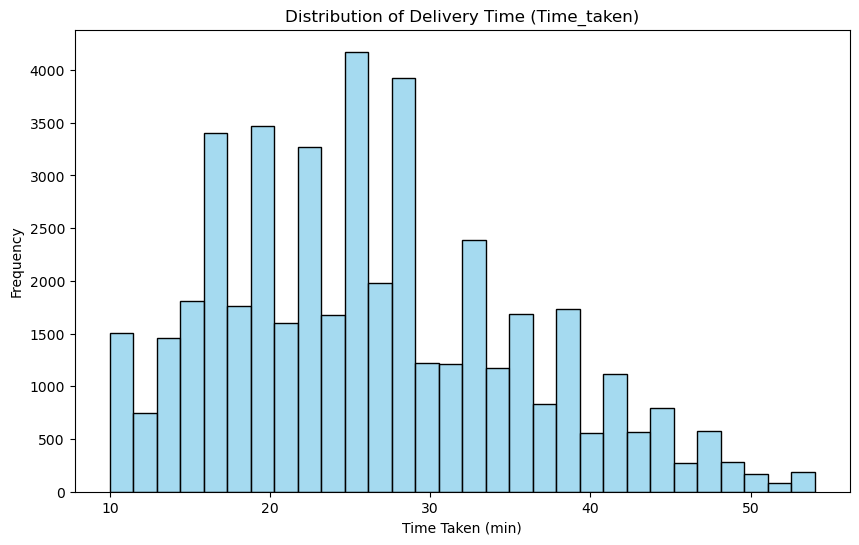

In [135]:
# Plotting the histogram for 'Time_taken(min)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Time_taken(min)'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Delivery Time (Time_taken)')
plt.xlabel('Time Taken (min)')
plt.ylabel('Frequency')
plt.show()

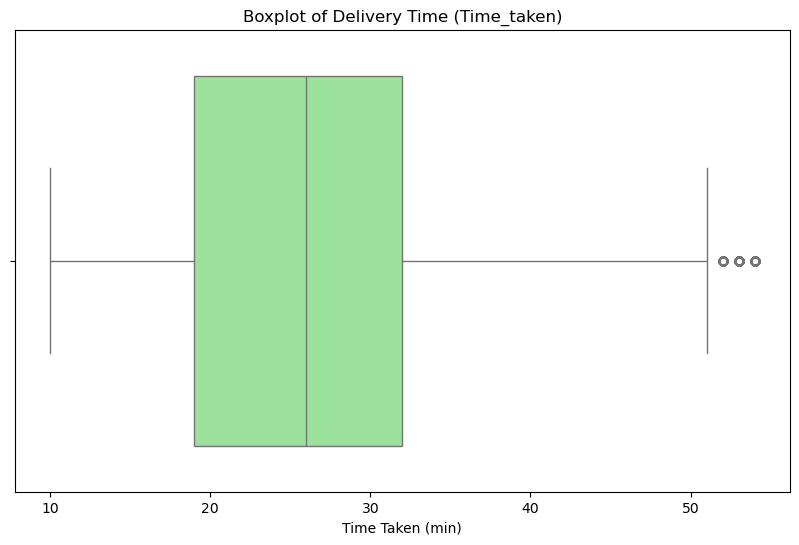

In [137]:
# Plotting the boxplot for 'Time_taken(min)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Time_taken(min)'], color='lightgreen')
plt.title('Boxplot of Delivery Time (Time_taken)')
plt.xlabel('Time Taken (min)')
plt.show()


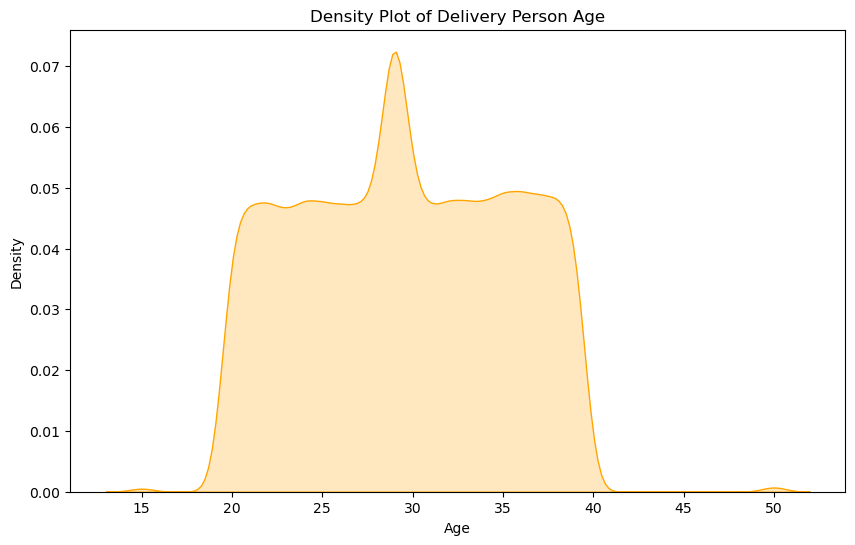

In [136]:
# Plotting the Density Plot for 'Delivery_person_Age'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Delivery_person_Age'], shade=True, color='orange')
plt.title('Density Plot of Delivery Person Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


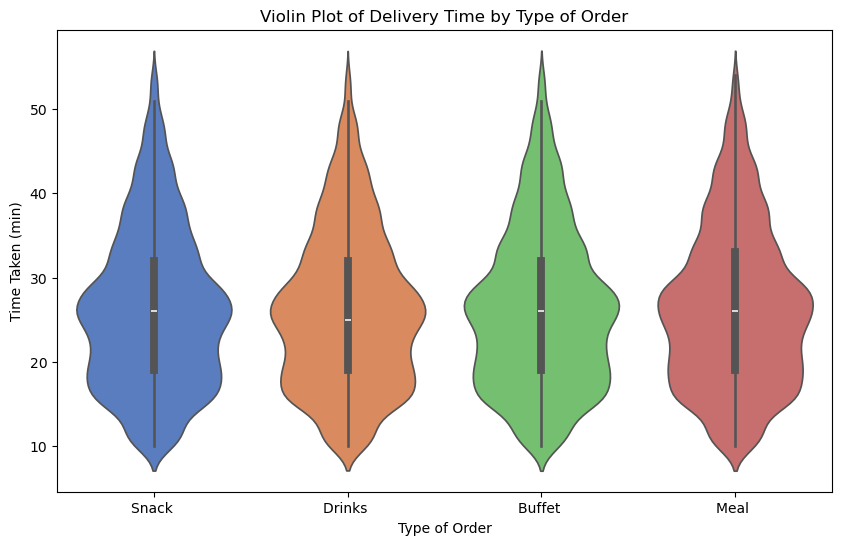

In [138]:
# Plotting the violin plot for 'Time_taken(min)' based on 'Type_of_order'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Type_of_order', y='Time_taken(min)', data=df, palette='muted')
plt.title('Violin Plot of Delivery Time by Type of Order')
plt.xlabel('Type of Order')
plt.ylabel('Time Taken (min)')
plt.show()

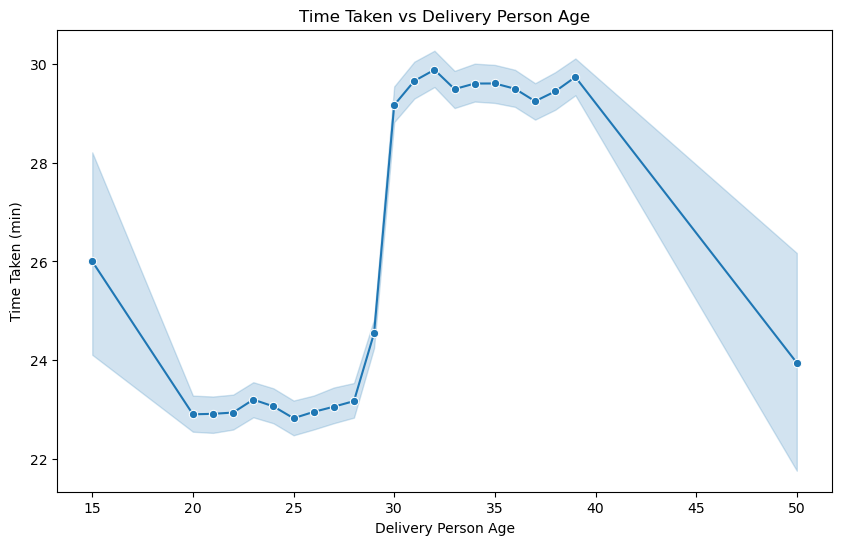

In [139]:
# Plotting 'Time_taken(min)' against 'Delivery_person_Age'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Delivery_person_Age', y='Time_taken(min)', data=df, marker='o')
plt.title('Time Taken vs Delivery Person Age')
plt.xlabel('Delivery Person Age')
plt.ylabel('Time Taken (min)')
plt.show()


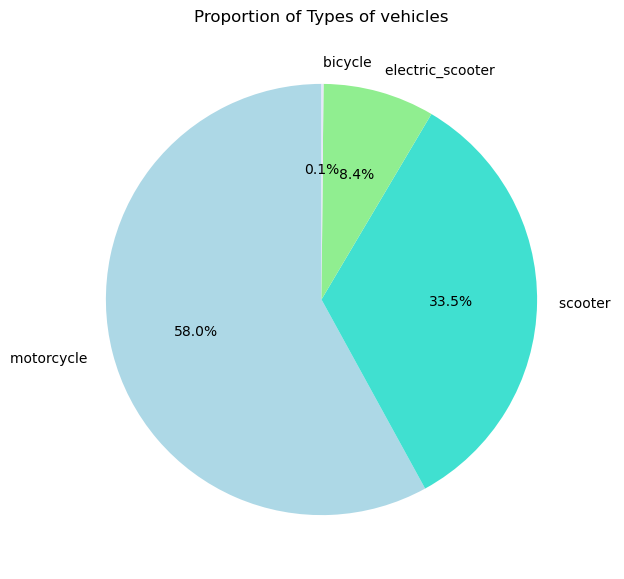

In [140]:
vehicle_type_counts = df['Type_of_vehicle'].value_counts()
plt.figure(figsize=(7, 7))
plt.title('Proportion of Types of vehicles')
plt.ylabel('')
plt.pie(vehicle_type_counts,labels = vehicle_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ADD8E6', '#40E0D0', '#90EE90', '#E6E6FA'])
plt.show()


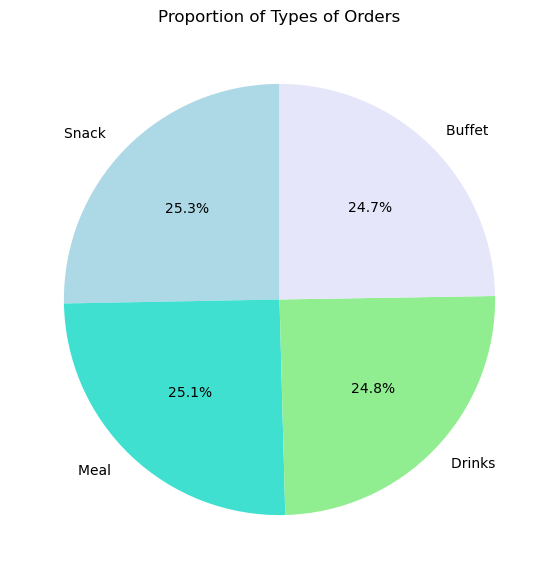

In [141]:
# Plotting the pie chart for 'Type_of_order' distribution
order_type_counts = df['Type_of_order'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(order_type_counts,labels = order_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ADD8E6', '#40E0D0', '#90EE90', '#E6E6FA'])
plt.title('Proportion of Types of Orders')
plt.ylabel('')
plt.show()



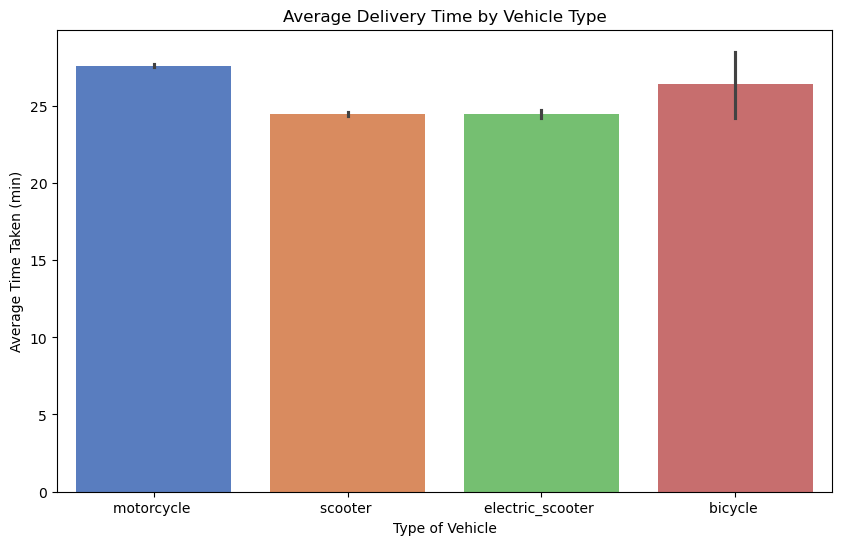

In [142]:
# Bar plot to compare average 'Time_taken(min)' for different 'Type_of_vehicle'
plt.figure(figsize=(10, 6))
sns.barplot(x='Type_of_vehicle', y='Time_taken(min)', data=df, palette='muted')
plt.title('Average Delivery Time by Vehicle Type')
plt.xlabel('Type of Vehicle')
plt.ylabel('Average Time Taken (min)')
plt.show()


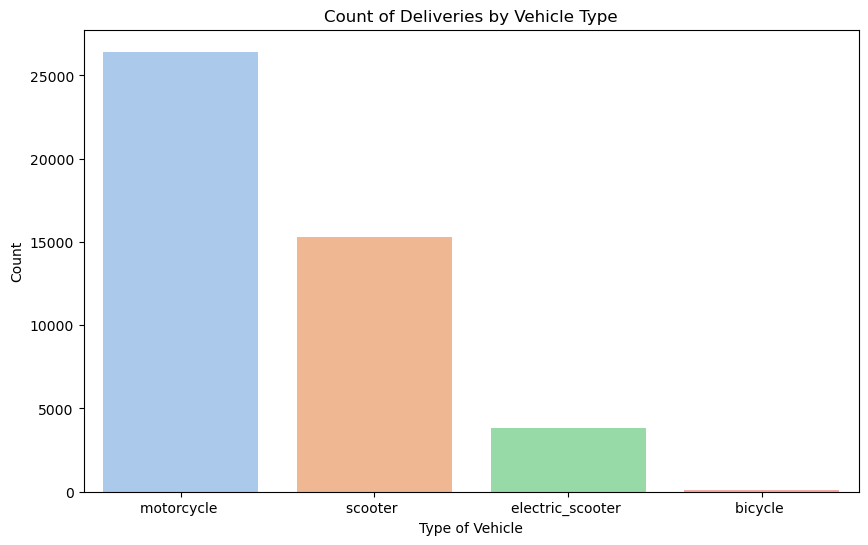

In [143]:
# Count plot for the distribution of 'Type_of_vehicle'
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_of_vehicle', data=df, palette='pastel')
plt.title('Count of Deliveries by Vehicle Type')
plt.xlabel('Type of Vehicle')
plt.ylabel('Count')
plt.show()


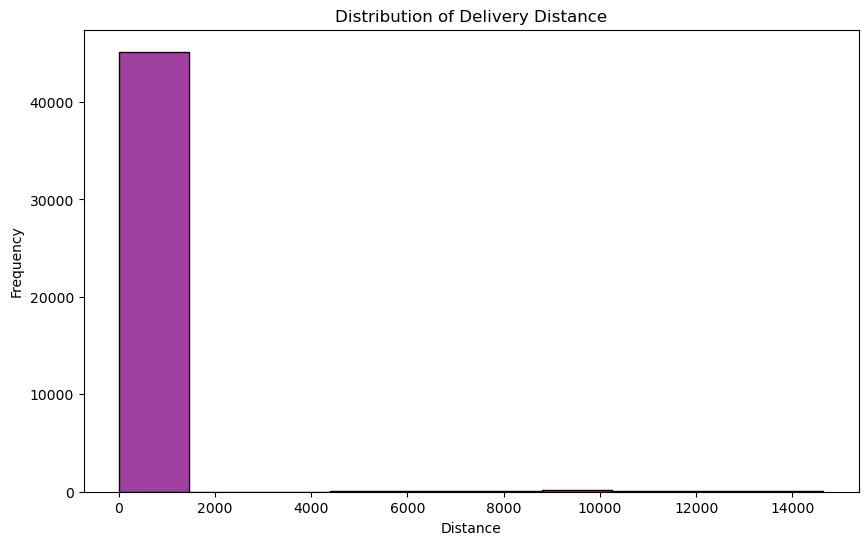

In [144]:
# Histogram for 'Distance'
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance'], bins=10, kde=False, color='purple')
plt.title('Distribution of Delivery Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()


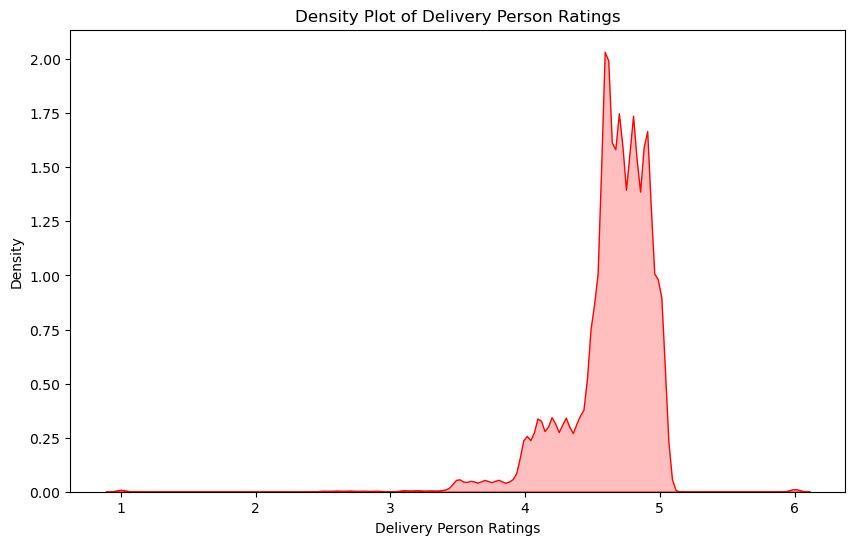

In [145]:
# Density Plot for 'Delivery_person_Ratings'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Delivery_person_Ratings'], shade=True, color='red')
plt.title('Density Plot of Delivery Person Ratings')
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Density')
plt.show()



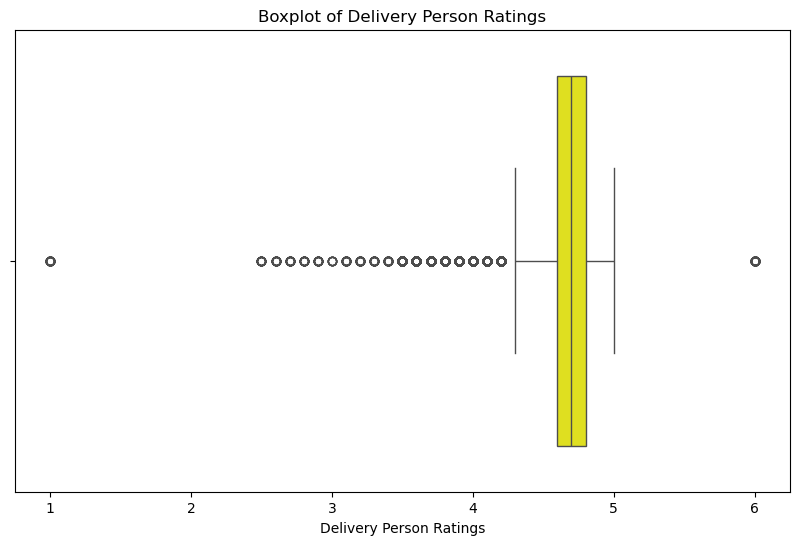

In [146]:
# Box Plot for 'Delivery_person_Ratings'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Delivery_person_Ratings'], color='yellow')
plt.title('Boxplot of Delivery Person Ratings')
plt.xlabel('Delivery Person Ratings')
plt.show()


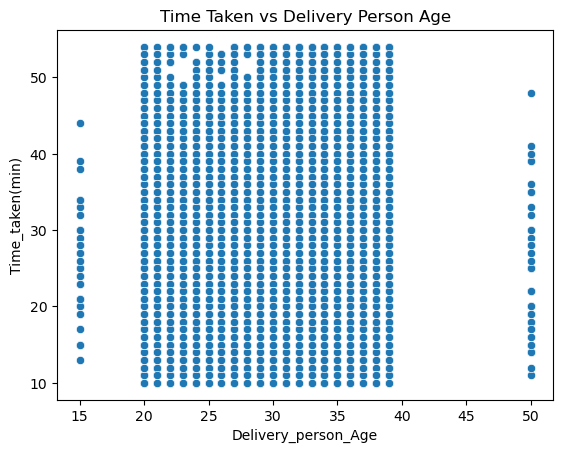

In [147]:
sns.scatterplot(x='Delivery_person_Age', y='Time_taken(min)', data=df)
plt.title('Time Taken vs Delivery Person Age')
plt.show()


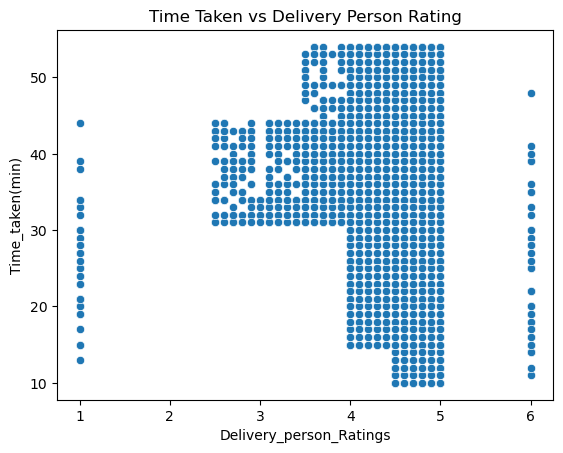

In [148]:
sns.scatterplot(x='Delivery_person_Ratings', y='Time_taken(min)', data=df)
plt.title('Time Taken vs Delivery Person Rating')
plt.show()


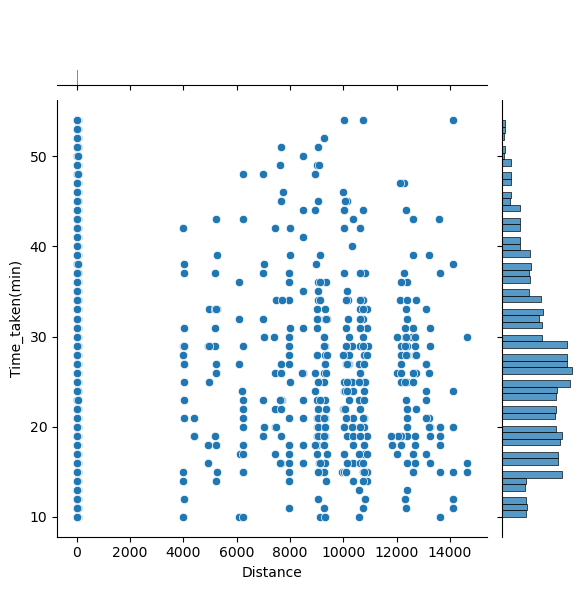

In [149]:
sns.jointplot(x='Distance', y='Time_taken(min)', data=df, kind="scatter")
plt.show()


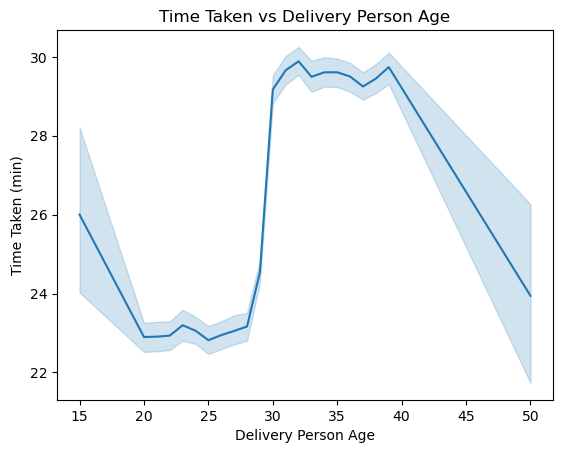

In [150]:

# Line plot to analyze trends in Time_taken(min) across Delivery_person_Age
sns.lineplot(x='Delivery_person_Age', y='Time_taken(min)', data=df)
plt.title('Time Taken vs Delivery Person Age')
plt.xlabel('Delivery Person Age')
plt.ylabel('Time Taken (min)')
plt.show()


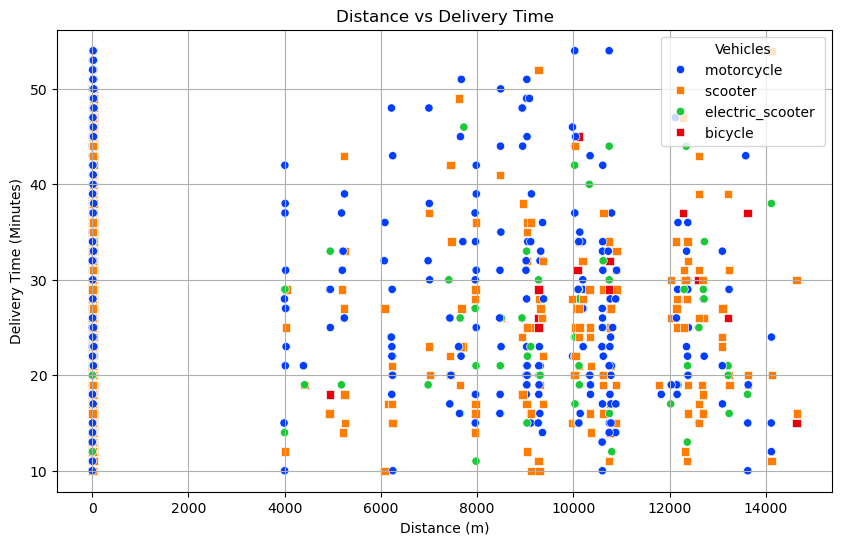

In [149]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'Distance', y ='Time_taken(min)',hue = 'Type_of_vehicle', data = df, palette = 'bright', style = 'Type_of_vehicle', markers=['o','s'])

plt.title('Distance vs Delivery Time')
plt.xlabel('Distance (m)')
plt.ylabel('Delivery Time (Minutes)')

plt.grid()
plt.legend(title='Vehicles')
plt.show()

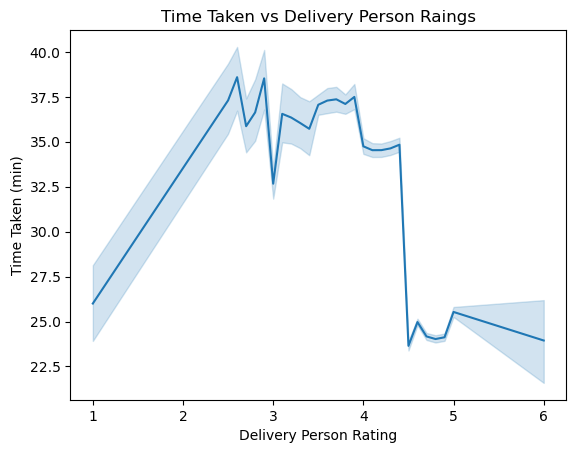

In [15]:

# Line plot to analyze trends in Time_taken(min) across Delivery_person_Ratings
sns.lineplot(x='Delivery_person_Ratings', y='Time_taken(min)', data=df)
plt.title('Time Taken vs Delivery Person Raings')
plt.xlabel('Delivery Person Rating')
plt.ylabel('Time Taken (min)')
plt.show()


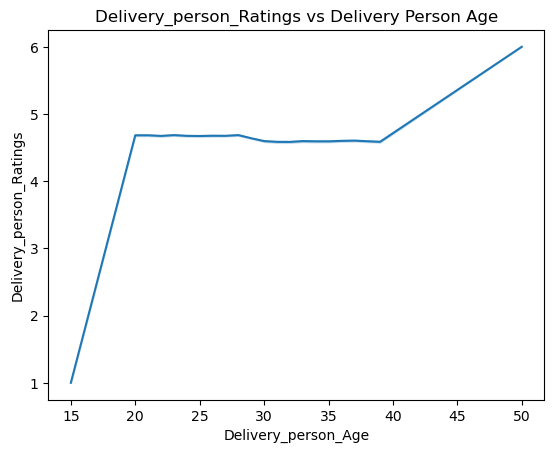

In [31]:
sns.lineplot(x='Delivery_person_Age', y='Delivery_person_Ratings', data=df)
plt.title('Delivery_person_Ratings vs Delivery Person Age')
plt.xlabel('Delivery_person_Age')
plt.ylabel('Delivery_person_Ratings')
plt.show()

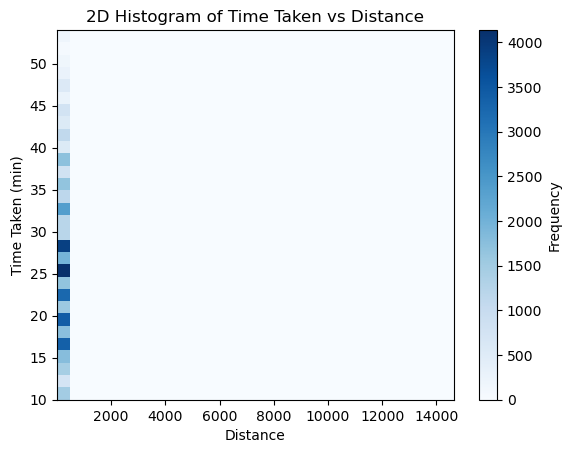

In [153]:
# 2D Histogram for Time_taken(min) and Distance
plt.hist2d(df['Distance'], df['Time_taken(min)'], bins=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('Distance')
plt.ylabel('Time Taken (min)')
plt.title('Delivery_person_Ratings vs Delivery Person Age')
plt.show()

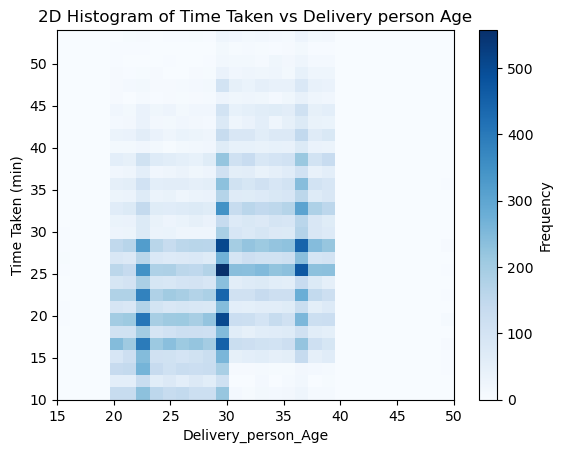

In [154]:
plt.hist2d(df['Delivery_person_Age'], df['Time_taken(min)'], bins=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('Delivery_person_Age')
plt.ylabel('Time Taken (min)')
plt.title('2D Histogram of Time Taken vs Delivery person Age')
plt.show()

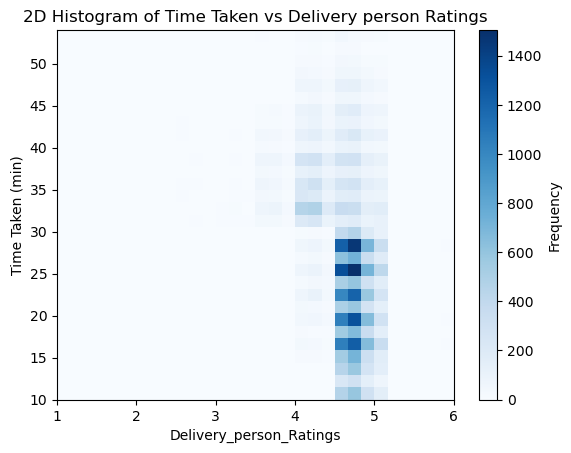

In [155]:
plt.hist2d(df['Delivery_person_Ratings'], df['Time_taken(min)'], bins=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('Delivery_person_Ratings')
plt.ylabel('Time Taken (min)')
plt.title('2D Histogram of Time Taken vs Delivery person Ratings')
plt.show()

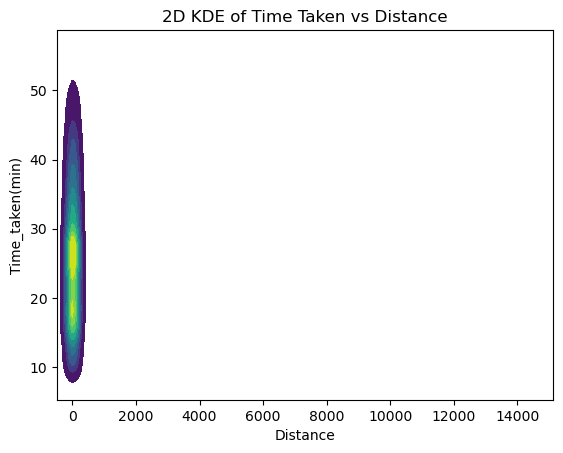

In [22]:

# 2D KDE plot for Distance vs Time_taken(min)
sns.kdeplot(x='Distance', y='Time_taken(min)', data=df, cmap='viridis', fill=True)
plt.title('2D KDE of Time Taken vs Distance')
plt.show()


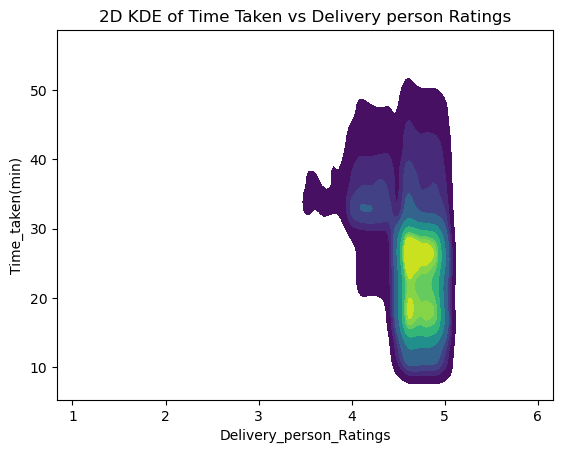

In [23]:
sns.kdeplot(x='Delivery_person_Ratings', y='Time_taken(min)', data=df, cmap='viridis', fill=True)
plt.title('2D KDE of Time Taken vs Delivery person Ratings')
plt.show()

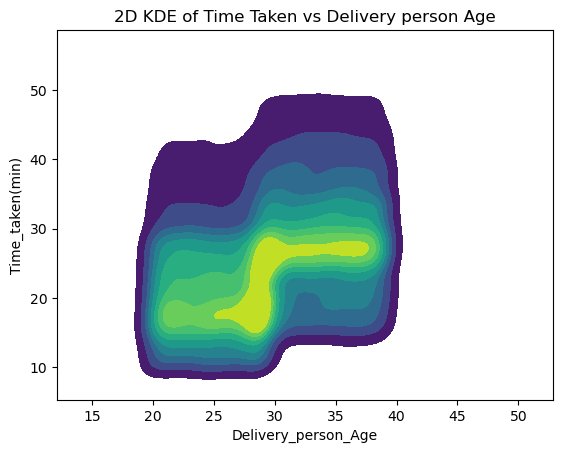

In [21]:
sns.kdeplot(x='Delivery_person_Age', y='Time_taken(min)', data=df, cmap='viridis', fill=True)
plt.title('2D KDE of Time Taken vs Delivery person Age')
plt.show()

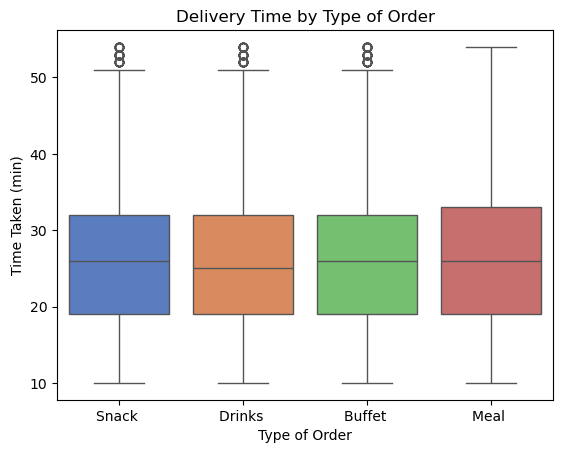

In [17]:

sns.boxplot(x='Type_of_order', y='Time_taken(min)', data=df,palette='muted')
plt.title('Delivery Time by Type of Order')
plt.xlabel('Type of Order')
plt.ylabel('Time Taken (min)')
plt.show()


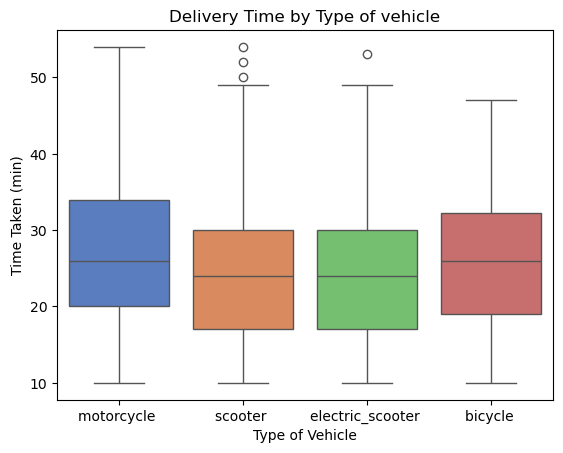

In [18]:
sns.boxplot(x='Type_of_vehicle', y='Time_taken(min)', data=df,palette='muted' )
plt.title('Delivery Time by Type of vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Time Taken (min)')
plt.show()


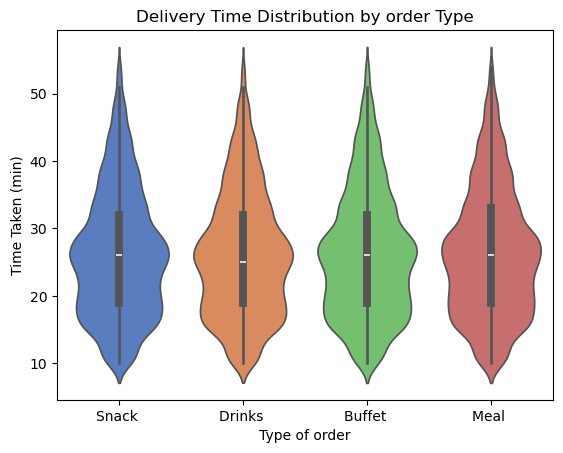

In [19]:

sns.violinplot(x='Type_of_order', y='Time_taken(min)', data=df,palette='muted')
plt.title('Delivery Time Distribution by order Type')
plt.xlabel('Type of order')
plt.ylabel('Time Taken (min)')
plt.show()


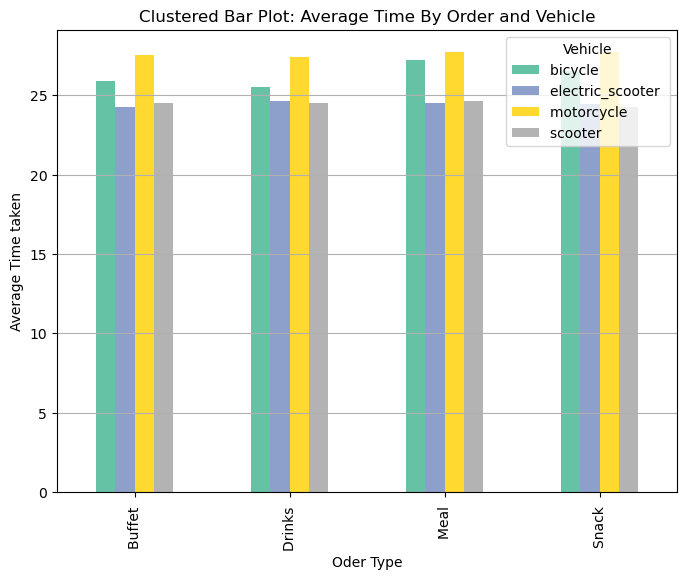

In [30]:
average_time_by_vehicle = df.groupby(['Type_of_order', 'Type_of_vehicle'])['Time_taken(min)'].mean().unstack()
average_time_by_vehicle.plot(kind='bar', colormap='Set2', figsize=(8, 6))
plt.xlabel('Oder Type')
plt.ylabel('Average Time taken')
plt.title('Clustered Bar Plot: Average Time By Order and Vehicle')
plt.legend(title = 'Vehicle')
plt.grid(axis ='y')
plt.show()

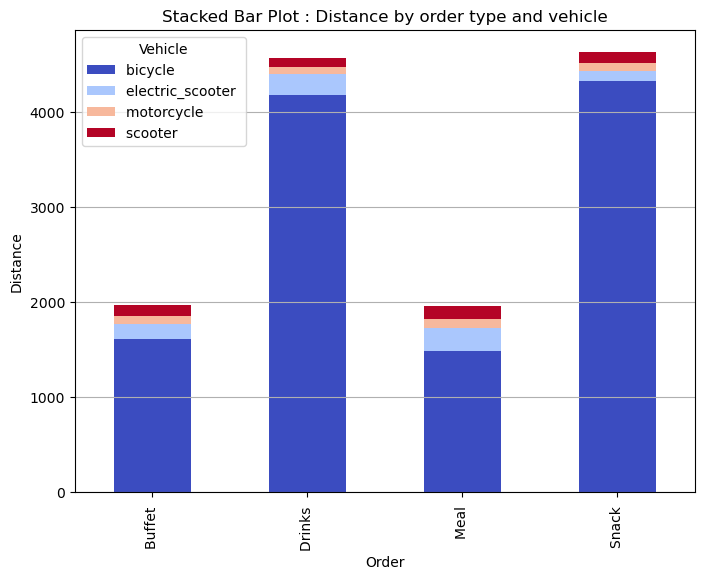

In [26]:
average_distance_by_vehicle = df.groupby(['Type_of_order', 'Type_of_vehicle'])['Distance'].mean().unstack()
average_distance_by_vehicle.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8, 6))
plt.xlabel('Order Type')
plt.ylabel('Distance')
plt.title('Stacked Bar Plot : Distance by order type and vehicle')
plt.legend(title = 'Vehicle') 
plt.grid(axis ='y')
plt.show()

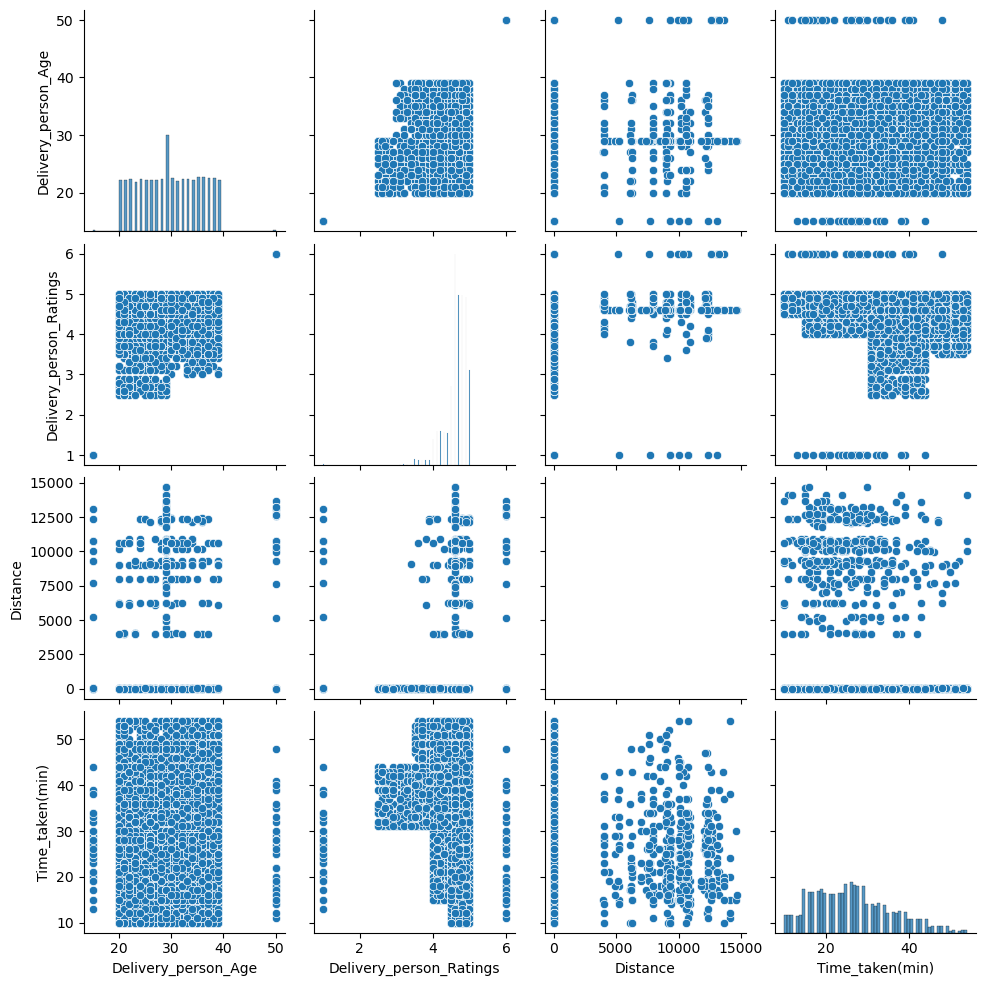

In [164]:
sns.pairplot(df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance', 'Time_taken(min)']])
plt.show()

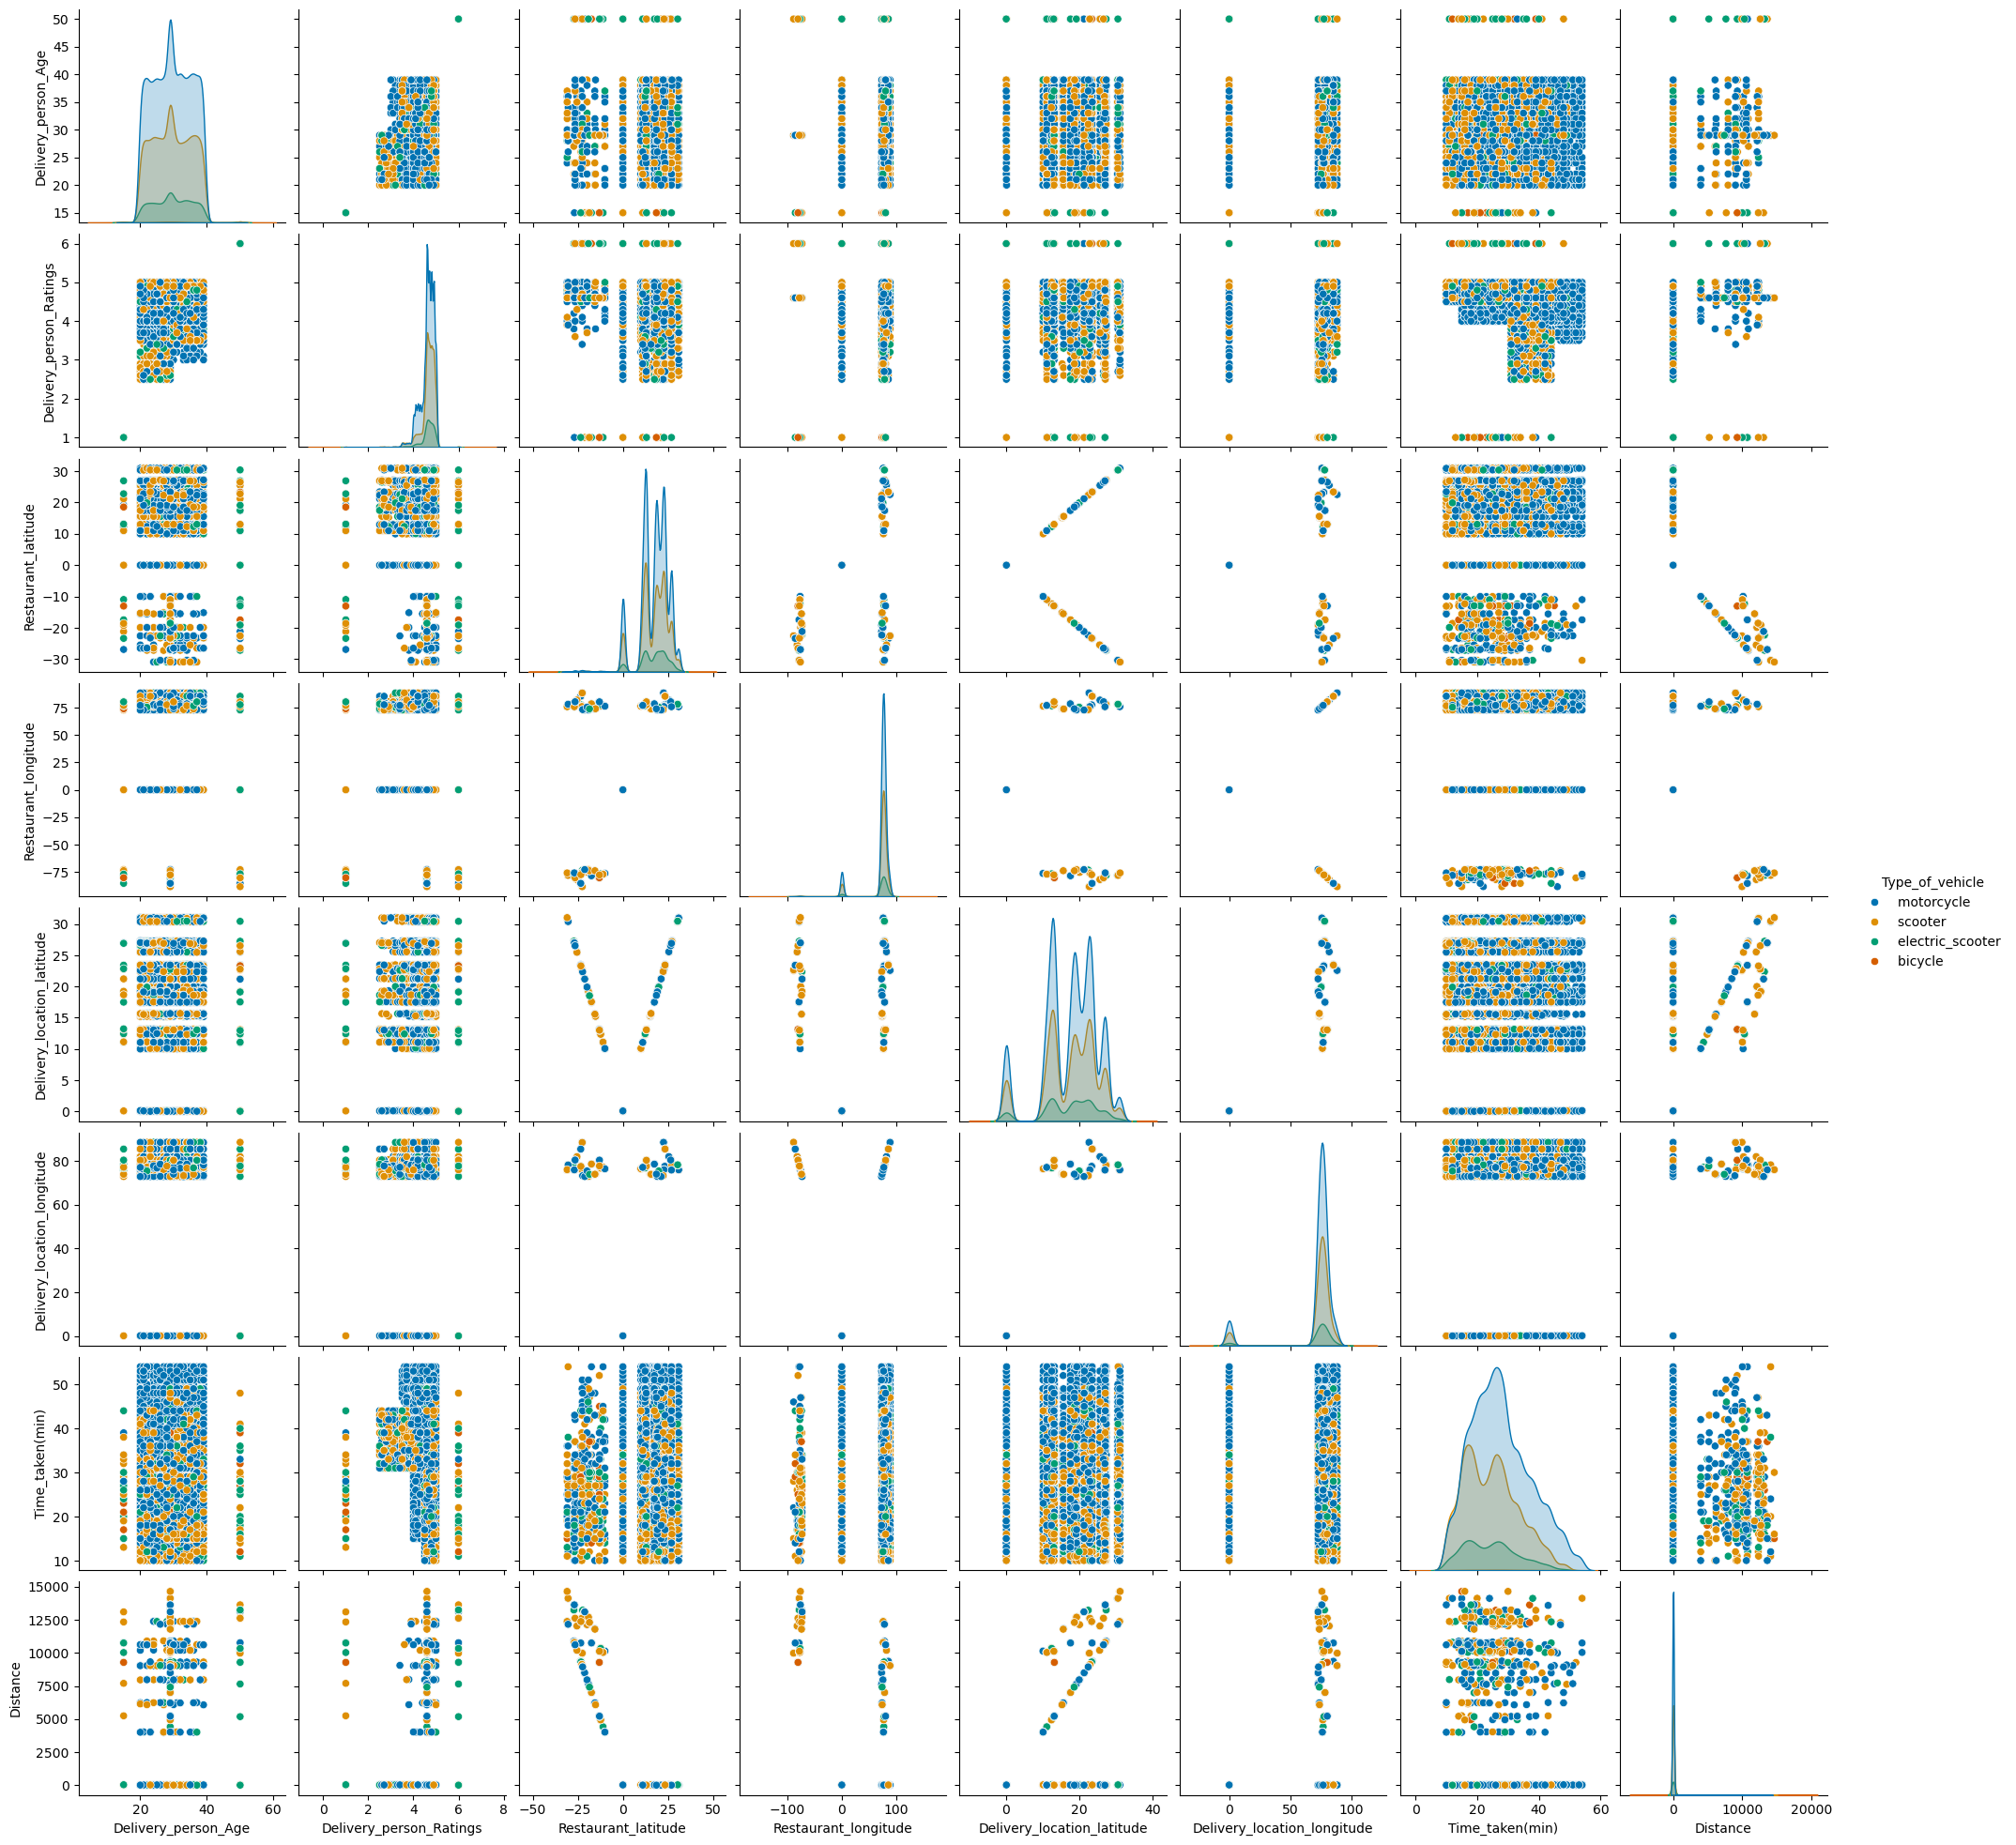

In [24]:
sns.pairplot(df, hue='Type_of_vehicle', palette = 'colorblind')
plt.show()

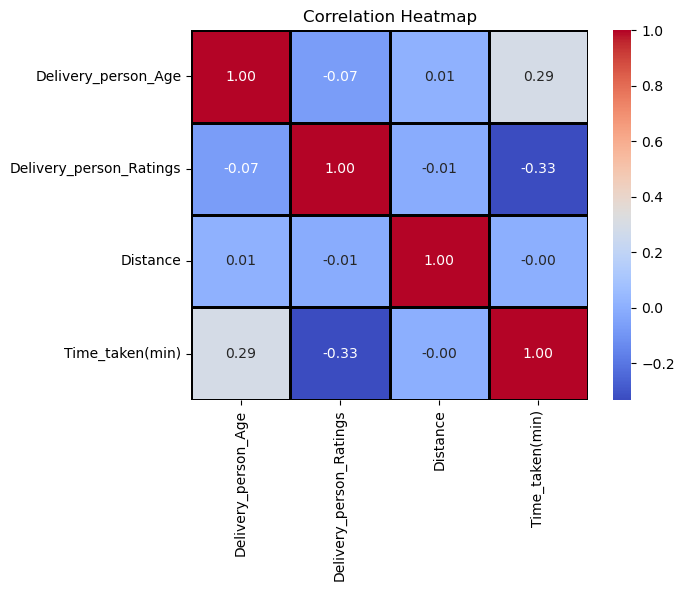

In [165]:
# Calculate correlation matrix
corr_matrix = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance', 'Time_taken(min)']].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()


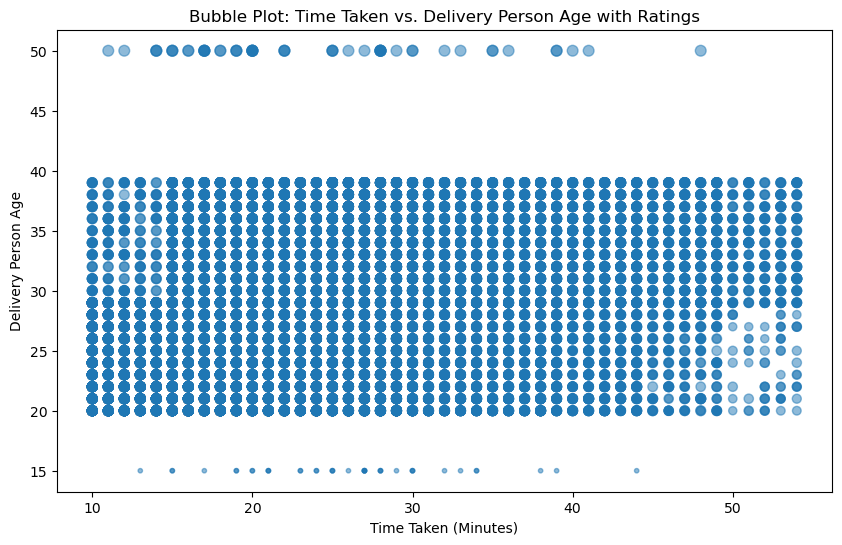

In [166]:
# Bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Time_taken(min)'], df['Delivery_person_Age'], s=df['Delivery_person_Ratings']*10, alpha=0.5)
plt.title('Bubble Plot: Time Taken vs. Delivery Person Age with Ratings')
plt.xlabel('Time Taken (Minutes)')
plt.ylabel('Delivery Person Age')
plt.show()

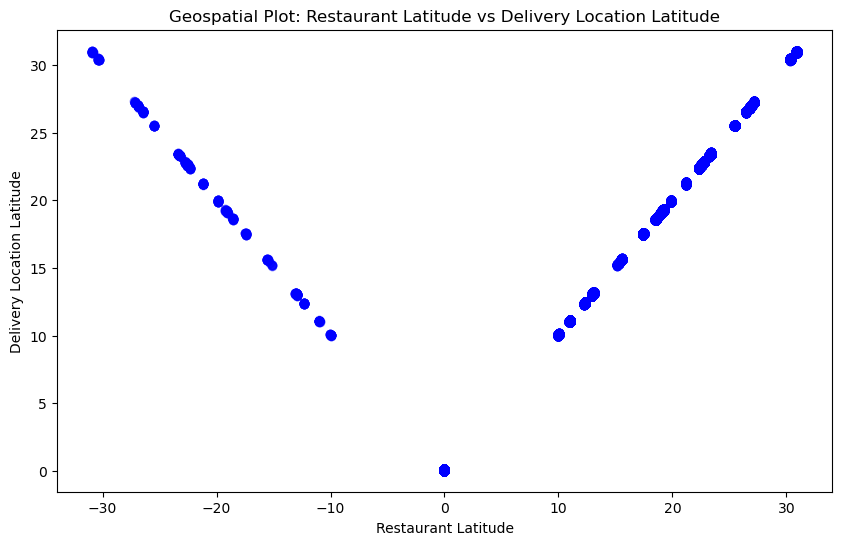

In [171]:
# Scatter plot of geographical data (latitude vs. longitude)
plt.figure(figsize=(10, 6))
plt.scatter(df['Restaurant_latitude'], df['Delivery_location_latitude'], c='blue', alpha=0.5)
plt.title('Geospatial Plot: Restaurant Latitude vs Delivery Location Latitude')
plt.xlabel('Restaurant Latitude')
plt.ylabel('Delivery Location Latitude')
plt.show()

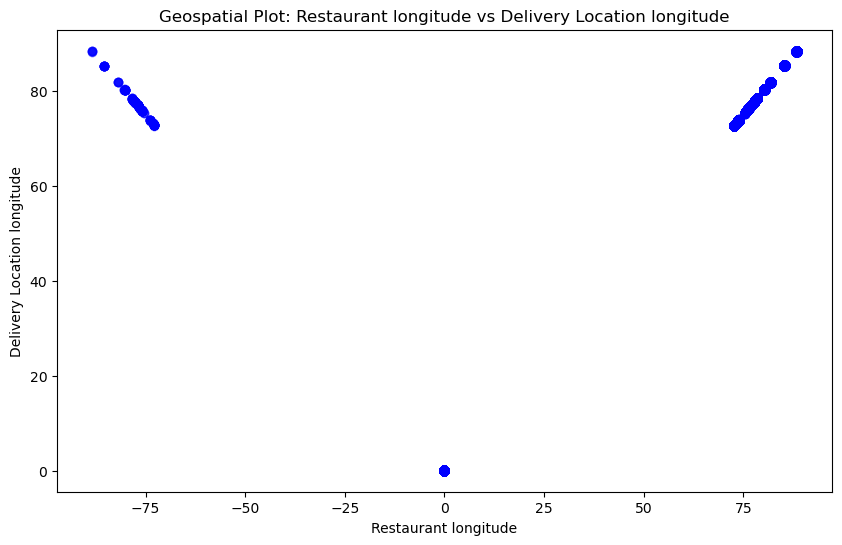

In [172]:
# Scatter plot of geographical data (latitude vs. longitude)
plt.figure(figsize=(10, 6))
plt.scatter(df['Restaurant_longitude'], df['Delivery_location_longitude'], c='blue', alpha=0.5)
plt.title('Geospatial Plot: Restaurant longitude vs Delivery Location longitude')
plt.xlabel('Restaurant longitude')
plt.ylabel('Delivery Location longitude')
plt.show()

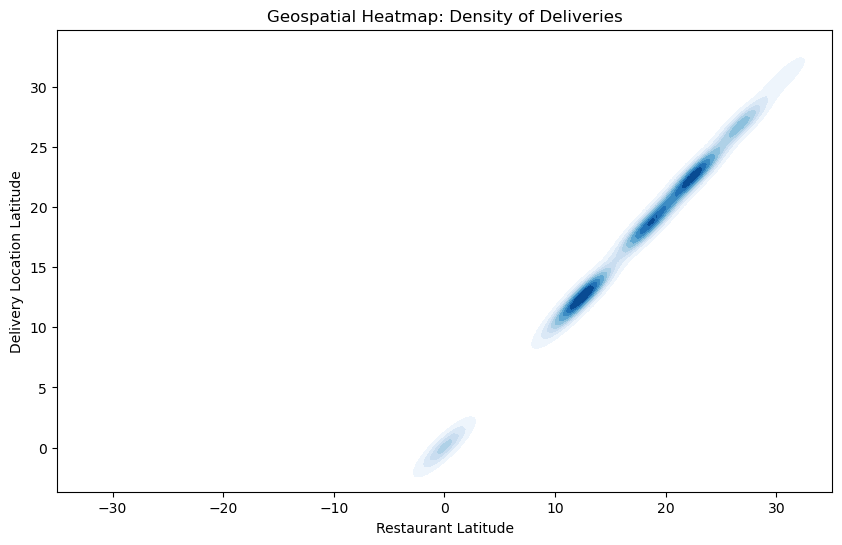

In [173]:


# Heatmap of latitude and longitude density
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['Restaurant_latitude'], y=df['Delivery_location_latitude'], cmap="Blues", fill=True)
plt.title('Geospatial Heatmap: Density of Deliveries')
plt.xlabel('Restaurant Latitude')
plt.ylabel('Delivery Location Latitude')
plt.show()


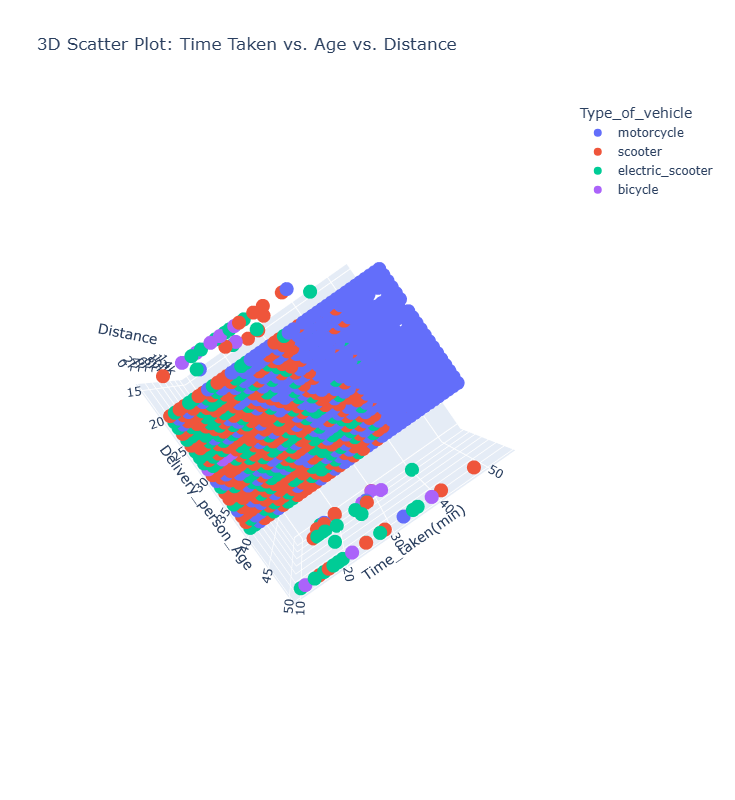

In [181]:


# 3D scatter plot


fig = px.scatter_3d(df, x = 'Time_taken(min)', y='Delivery_person_Age',z='Distance',color = 'Type_of_vehicle',
                    labels = {'Vehicles':'Types-of_vehicles'},
                    title ='3D Scatter Plot: Time Taken vs. Age vs. Distance')
fig.update_layout(
    height=800,
    width=1200
)
fig.show()
            

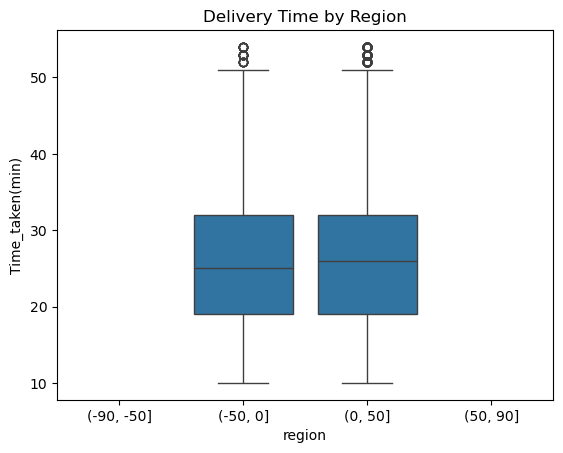

In [176]:
df['region'] = pd.cut(df['Restaurant_latitude'], bins=[-90, -50, 0, 50, 90])  # Example of binning latitudes
sns.boxplot(x='region', y='Time_taken(min)', data=df)
plt.title('Delivery Time by Region')
plt.show()


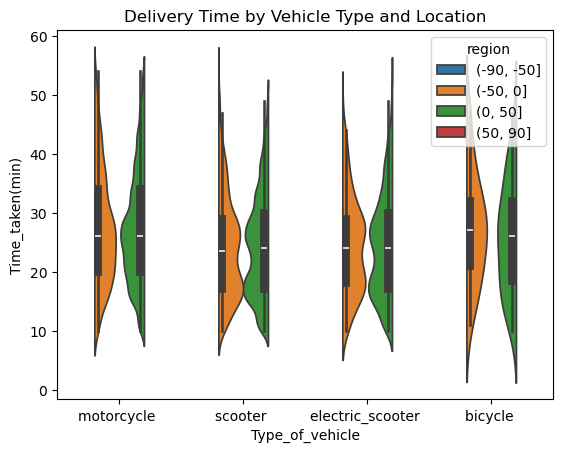

In [177]:
sns.violinplot(x='Type_of_vehicle', y='Time_taken(min)', hue='region', data=df, split=True)
plt.title('Delivery Time by Vehicle Type and Location')
plt.show()


# Statistics

In [78]:
# Filter the rows where the 'Type_of_vehicle' is 'Scooter' and select 'Time_taken(min)'
scooter_time_taken = df[df['Type_of_vehicle'] == 'scooter']['Time_taken(min)']

# Display the result
print(scooter_time_taken)


Series([], Name: Time_taken(min), dtype: int64)


In [142]:
print('\nMean Of Time taken:', df['Time_taken(min)'].mean())
print('\nMean Of Distance:', df['Distance'].mean())

print('\nVariance Of Time_taken(min) :', df['Time_taken(min)'].var())
print('\nVAriance Of Distance:', df['Distance'].var())

t_statistic, p_value = stats.ttest_ind(df['Time_taken(min)'], df['Distance'])

print("\n",f"T-statistics: {t_statistic}")
print("\n",f"P-Value: {p_value}")

alpha = .05

if p_value < alpha:
    print('\nReject the null hypothesis: The Mean Of Time taken is significantly different from the Mean Of Distance .')
else:
    print('\nFail to reject the null hypothesis: The Mean Of Time taken  is not significantly different from the Mean Of Distance.')


Mean Of Time taken: 26.29460662821047

Mean Of Distance: 107.33234876134686

Variance Of Time_taken(min) : 88.05581776999996

VAriance Of Distance: 922529.0575516006

 T-statistics: -18.01464316573277

 P-Value: 1.9982063106786785e-72

Reject the null hypothesis: The Mean Of Time taken is significantly different from the Mean Of Distance .


In [140]:
#Anova One-way test
# Applying the ANOVA test
f_stats, p_value = stats.f_oneway(df["Delivery_person_Ratings"],df["Time_taken(min)"],df['Distance'])
# Define significance level (alpha)
alpha = .05
# Display the results of the ANOVA test
print(f'F-Statistic : {f_stats:.2f}')
print(f"P-Value : {p_value :.4f}")
# Compare the p-value with the significance level (alpha)
if p_value <= alpha:
    print(f"P-Value ({p_value:.4f}) is less than the significance level ({alpha})")
    print("Conclusion: We reject the null hypothesis.")
    print("This means that there is a statistically significant difference in the means of the variables (Delivery Person Ratings, Time Taken and distance).")
else:
    print(f"P-Value ({p_value:.4f}) is greater than the significance level ({alpha})")
    print("Conclusion: We fail to reject the null hypothesis.")
    print("This suggests that there is no statistically significant difference in the means of the variables (Delivery Person Ratings, Time Taken and distance).")

F-Statistic : 434.47
P-Value : 0.0000
P-Value (0.0000) is less than the significance level (0.05)
Conclusion: We reject the null hypothesis.
This means that there is a statistically significant difference in the means of the variables (Delivery Person Ratings, Time Taken and distance).


In [59]:
#Anova One-way test
# Applying the ANOVA test
f_stats, p_value = stats.f_oneway(df['Delivery_person_Age'], df["Delivery_person_Ratings"],df["Time_taken(min)"])
# Define significance level (alpha)
alpha = .05
# Display the results of the ANOVA test
print(f'F-Statistic : {f_stats:.2f}')
print(f"P-Value : {p_value :.4f}")
# Compare the p-value with the significance level (alpha)
if p_value <= alpha:
    print(f"P-Value ({p_value:.4f}) is less than the significance level ({alpha})")
    print("Conclusion: We reject the null hypothesis.")
    print("This means that there is a statistically significant difference in the means of the variables (Delivery Person Age, Delivery Person Ratings, and Time Taken).")
else:
    print(f"P-Value ({p_value:.4f}) is greater than the significance level ({alpha})")
    print("Conclusion: We fail to reject the null hypothesis.")
    print("This suggests that there is no statistically significant difference in the means of the variables (Delivery Person Age, Delivery Person Ratings, and Time Taken).")

F-Statistic : 207976.08
P-Value : 0.0000
P-Value (0.0000) is less than the significance level (0.05)
Conclusion: We reject the null hypothesis.
This means that there is a statistically significant difference in the means of the variables (Delivery Person Age, Delivery Person Ratings, and Time Taken).


In [23]:
df['Distance_Category'] = pd.qcut(df['Distance'], q=3, labels=['Low', 'Medium', 'High'])

df[['Distance', 'Distance_Category']].head()

Distance Distance_Category
0   5.016235               Low
1  35.321316              High
2   2.718015               Low
3  13.738727            Medium
4  10.867107               Low

In [25]:
# Now proceed with the contingency table and Chi-Square test 
contingency_table = pd.crosstab(df['Distance_Category'], df['Time_taken(min)'])
print('Contingency Table:\n', contingency_table)

# Perform the Chi-Square test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-Square Statistic:', chi2)
print('P-value:', p)
print('Degrees of freedom:', dof)
print('Expected Frequencies:\n', expected)

alpha = 0.05  # Significance level
if p <= alpha:
    print('Reject the null hypothesis - Distance Category and Time_taken(min) are dependent.')
else:
    print('Fail to reject the null hypothesis - Distance Category and Time_taken(min) are independent.')

Contingency Table:
 Time_taken(min)    10.0  11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  \
Distance_Category                                                               
Low                 396   381   381   384   384   787   807   788   781   804   
Medium              248   252   252   223   241   588   525   521   577   595   
High                106   124   113   109   114   435   374   387   407   425   

Time_taken(min)    ...  45.0  46.0  47.0  48.0  49.0  50.0  51.0  52.0  53.0  \
Distance_Category  ...                                                         
Low                ...    27    39    31    33    36     7     6     8     9   
Medium             ...    64    84    92    75    96    24    25    19    36   
High               ...   150   151   172   169   148    41    63    52    55   

Time_taken(min)    54.0  
Distance_Category        
Low                   8  
Medium               27  
High                 56  

[3 rows x 45 columns]
Chi-Square Statistic

In [108]:
# Group by 'Type_of_order' and 'Type_of_vehicle', then calculate the average Time_taken(min)
 = df.groupby(['Type_of_order', 'Type_of_vehicle'])['Time_taken(min)'].mean().reset_index()

# Display the average time taken for each combination
grouped_avg_time.rename(columns={'Time_taken(min)': 'Time_taken'}, inplace=True)

grouped_avg_time

Type_of_order    Type_of_vehicle  Time_taken
0        Buffet            bicycle    25.933333
1        Buffet   electric_scooter    24.256628
2        Buffet         motorcycle    27.566945
3        Buffet            scooter    24.526697
4        Drinks            bicycle    25.562500
5        Drinks   electric_scooter    24.630137
6        Drinks         motorcycle    27.395591
7        Drinks            scooter    24.514771
8          Meal            bicycle    27.260870
9          Meal   electric_scooter    24.540084
10         Meal         motorcycle    27.712183
11         Meal            scooter    24.632115
12        Snack            bicycle    26.571429
13        Snack   electric_scooter    24.452772
14        Snack         motorcycle    27.743798
15        Snack            scooter    24.254494

In [131]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# Create the model using Type_of_order, Type_of_vehicle as independent variables
# and Time_taken(min) as the dependent variable
model = ols('Time_taken ~ C(Type_of_order) + C(Type_of_vehicle) + C(Type_of_order):C(Type_of_vehicle)', data=grouped_avg_time).fit()
# Perform the two-way ANOVA
anova_results = anova_lm(model)

# Print the results
print(anova_results)



                                      df        sum_sq   mean_sq    F  PR(>F)
C(Type_of_order)                     3.0  6.450726e-01  0.215024  0.0     NaN
C(Type_of_vehicle)                   3.0  2.808690e+01  9.362300  0.0     NaN
C(Type_of_order):C(Type_of_vehicle)  9.0  1.255916e+00  0.139546  0.0     NaN
Residual                             0.0  1.917248e-26       inf  NaN     NaN
